In [1]:
import os                           # [built-in library] 운영 체제 관련 기능을 사용하기 위한 라이브러리
import cv2                          # 이미지 처리 및 컴퓨터 비전 작업을 위한 OpenCV 라이브러리
import math                         # [built-in library] 수학 연산을 위한 라이브러리
import numpy as np                  # 다차원 배열 및 행렬 연산을 위한 라이브러리
import matplotlib.pyplot as plt     # 데이터 시각화를 위한 라이브러리
from PIL import Image               # 이미지 처리를 위한 Python Imaging Library (PIL)

In [2]:
def find_centroid(contour):
    # Calculate moments for the contour
    M = cv2.moments(contour)

    # Ensure that the moment is not zero to avoid division by zero error
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    return (cX, cY)

def calculate_circularity_from_contour(contour):
    """
    Calculate the circularity of an object using its contour.

    :param contour: Contour of the object.
    :return: Circularity value. (For a perfect circle, it's 1)
    """
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if perimeter == 0:
        return 0  # To avoid division by zero
    return (4 * math.pi * area) / (perimeter ** 2)

def calculate_roundness_from_contour(contour):
    """
    Calculate the roundness of an object using its contour.

    :param contour: Contour of the object.
    :return: Roundness value. (For a perfect circle, it's 1)
    """
    area = cv2.contourArea(contour)

    # Fitting an ellipse to the contour and getting the major and minor axes
    ellipse = cv2.fitEllipse(contour)
    major_axis_length = max(ellipse[1])

    if major_axis_length == 0:
        return 0  # To avoid division by zero
    return (4 * area) / (math.pi * major_axis_length ** 2)

In [3]:
image_file  = os.listdir(os.curdir)[1]      # 현재 디렉토리에서 파일 목록을 가져옵니다.
image_array = cv2.imread(image_file)        # OpenCV를 사용하여 이미지 파일을 읽어들입니다.
                                            # 이미지는 BGR (Blue, Green, Red) 형식으로 읽어집니다.

image_array.shape                           # 이미지 배열의 형태(shape)를 확인합니다.
                                            # 이미지 배열은 높이(height), 너비(width), 채널 수 (색상 채널인 R, G, B)로 이루어져 있습니다.
                                            # 예를 들어, 362 (높이), 486 (너비), 3 (채널 수)의 형태를 가진 이미지 배열입니다.

image_array2 = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB) # OpenCV에서 읽어들인 이미지는 기본적으로 BGR 형식입니다.
                                                            # 이를 RGB 형식으로 변환합니다. (Matplotlib에서 이미지를 정확하게 표시하려면 RGB 형식이어야 합니다.)


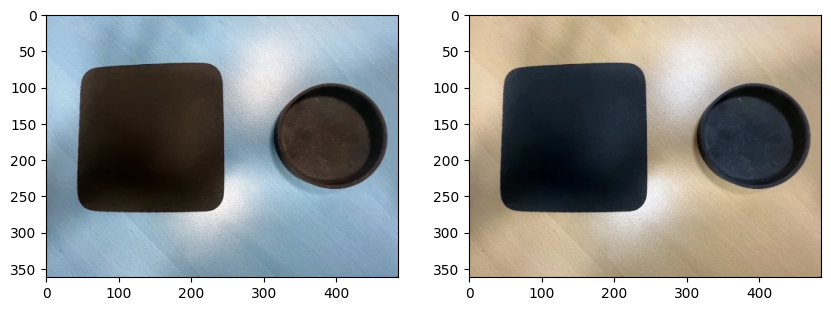

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image_array)   # 이미지 배열을 Matplotlib을 사용하여 시각화합니다.
                            # OpenCV에서 읽어들인 이미지는 BGR 형식으로 되어있기 때문에, 기본적으로 plt.imshow()는 BGR 형식의 이미지를 표시합니다.
                            # 이미지 배열의 차원은 [가로, 세로, 색상차원] 순서로 되어 있습니다.
                            # 여기서 이미지 배열의 차원은 가로, 세로, 색상차원 (BGR) 순서로 되어 있습니다.
                            # plt.imshow() 함수는 이러한 형태의 이미지 배열을 색상 차원이 R, G, B 순서로 해석하여 이미지를 표시합니다.
                            # 따라서 BGR 형식의 이미지가 올바르게 R, G, B 순서로 표시됩니다.
ax[1].imshow(image_array2)

In [5]:
# 🔥 Stage 1. 영상분할
# [RGB image -> Grayscale image -> binary image] 로 변환합니다.
# Binary image에 대해서 Contour를 찾습니다.

image_gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)  # 이미지를 회색조로 변환합니다. cv2.COLOR_BGR2GRAY를 사용하여 BGR 이미지를 회색 이미지로 변환합니다.
image_gray.shape                                            # 회색 이미지의 형태를 확인합니다. 회색 이미지는 흑백 이미지로, 2차원 배열로 표현됩니다.
                                                            # 예를 들어, 362 (높이), 486 (너비)의 2차원 배열입니다

_, binary = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY_INV)  # 이미지를 이진화합니다. 픽셀 값이 100 미만인 부분은 0으로, 100 이상인 부분은 255로 바뀝니다.
                                                                        # cv2.THRESH_BINARY_INV 플래그를 사용하여 이진화된 이미지의 반전된 버전을 얻습니다.

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # 이미지에서 윤곽선(contours)을 찾습니다.
                                                                                    # cv2.findContours 함수는 이진화된 이미지에서 윤곽선을 찾는 함수입니다.
                                                                                    # RETR_EXTERNAL 플래그를 사용하여 바깥쪽 윤곽선만 찾습니다.
                                                                                    # CHAIN_APPROX_SIMPLE 플래그를 사용하여 윤곽선을 근사화합니다.

cv2.drawContours(image_array2, contours, -1, (0, 255, 0), 2)    # 찾아진 윤곽선을 원본 이미지에 초록색 (0, 255, 0)으로 그립니다.
                                                                # -1은 모든 윤곽선을 의미합니다. 두께는 2로 지정되어 있습니다.
                                                                # 이 작업은 이미지에 contour를 그려 넣는 "In-place 연산"입니다.
                                                                # In-place 연산 >>> 함수 내부에서 객체의 값이 바뀌는 것

array([[[218, 196, 167],
        [212, 191, 164],
        [213, 192, 167],
        ...,
        [213, 194, 171],
        [212, 193, 169],
        [212, 193, 169]],

       [[209, 186, 158],
        [210, 187, 159],
        [212, 189, 163],
        ...,
        [211, 190, 165],
        [210, 189, 164],
        [210, 189, 164]],

       [[215, 190, 162],
        [226, 201, 173],
        [220, 195, 167],
        ...,
        [212, 189, 163],
        [212, 189, 163],
        [216, 193, 167]],

       ...,

       [[193, 170, 139],
        [187, 163, 132],
        [178, 153, 123],
        ...,
        [185, 161, 128],
        [179, 156, 125],
        [169, 149, 119]],

       [[186, 163, 132],
        [184, 159, 129],
        [193, 168, 138],
        ...,
        [167, 144, 116],
        [154, 133, 106],
        [149, 130, 104]],

       [[180, 158, 126],
        [193, 168, 138],
        [195, 171, 140],
        ...,
        [148, 127, 102],
        [151, 132, 109],
        [142, 125, 104]]

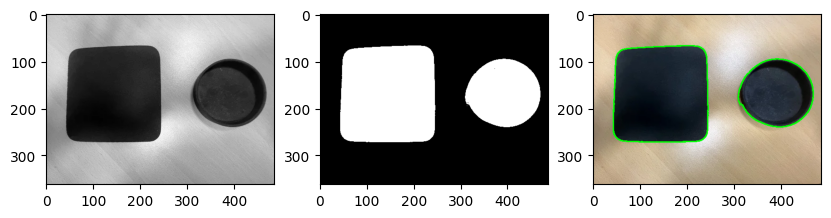

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(image_gray, cmap='gray')
ax[1].imshow(binary, cmap='gray')
ax[2].imshow(image_array2)

In [7]:
# 🔥 Stage 2. 오른쪽 물체 찾기
# [Contour -> Centroid -> 가장 오른쪽 값] 선택

list_of_cx = []             # 물체의 중심의 x 좌표를 저장할 리스트
list_of_coord = []          # 물체의 중심 좌표 [cx, cy]를 저장할 리스트

# 모든 윤곽선(contours)에 대해 물체의 중심을 찾고, 중심 좌표를 list_of_cx와 list_of_coord에 저장합니다.
for each_contour in contours:
    cx, cy = find_centroid(each_contour)
    list_of_cx.append(cx)
    list_of_coord.append([cx, cy])

# list_of_cx 리스트에서 최대값의 인덱스를 찾아 해당 물체의 윤곽선을 가져옵니다.
right_object_idx = np.argmax(list_of_cx)
right_contour = contours[right_object_idx]

In [8]:
# 🔥 Stage 3. 원형수치화
# 원형의 수치화를 위한 지표는 두 가지 (원형도, 둥글기)를 활용합니다.
# Contour 값에 대한 각 값을 계산합니다.

# right_contour 변수에 저장된 물체의 윤곽선을 사용하여 원형도(circularity) 및 둥글기(roundness) 점수를 계산합니다.
circul_score = calculate_circularity_from_contour(right_contour)
round_score = calculate_roundness_from_contour(right_contour)

# contours 리스트에서 가장 마지막에 있는 윤곽선 (직사각형 등의 도형)에 대해 원형도와 둥글기 점수를 계산합니다.
# 이를 통해 직사각형 모양의 물체의 원형도와 둥글기를 비교할 수 있습니다.
# calculate_circularity_from_contour(contours[-1]), calculate_roundness_from_contour(contours[-1])

# format string
f'Circularity: {circul_score:.4}, Roundness: {round_score:.4}'

'Circularity: 0.8745, Roundness: 0.905'

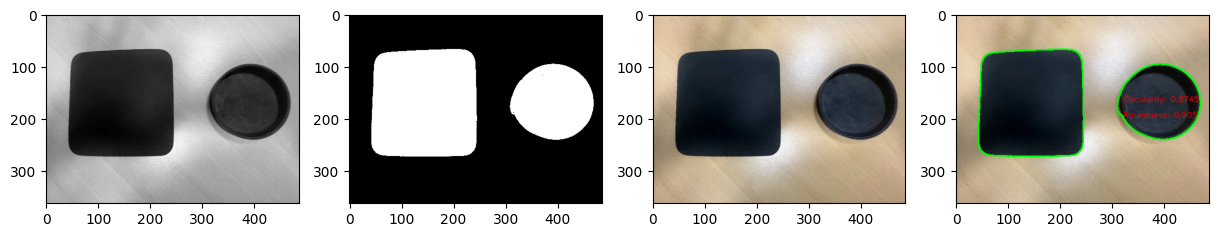

In [9]:
image_array = cv2.imread(image_file)    # 이미지 파일을 다시 읽어와서 image_array에 저장합니다 -> In-place 연산 초기화
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

image_array_for_visualization = image_array.copy()    # 시각화용 이미지 변수를 만듭니다.
cv2.drawContours(image_array_for_visualization, contours, -1, (0, 255, 0), 2)   # 초록색 conTour를 그려줍니다.

# 가장 오른쪽에 있는 물체의 중심 좌표를 가져옵니다.
right_cx = list_of_coord[1][0]
right_cy = list_of_coord[1][1]

# 이미지에 물체의 원형도와 둥글기 점수를 표시하는 텍스트를 추가합니다.
# cv2.putText 함수를 사용하여 이미지에 텍스트를 추가할 수 있습니다.
# 텍스트 내용, 위치, 폰트, 글씨 크기, 색상, 두께, 선의 형태 등을 지정할 수 있습니다.
cv2.putText(image_array_for_visualization, f'Circularity: {circul_score:.4}', (right_cx - 70, right_cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
cv2.putText(image_array_for_visualization, f'Roundness: {round_score:.4}', (right_cx - 70, right_cy+30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].imshow(image_gray, cmap='gray')
ax[1].imshow(binary, cmap='gray')
ax[2].imshow(image_array)
ax[3].imshow(image_array_for_visualization)